<a href="https://colab.research.google.com/github/fernandofeltrin/REDES-NEURAIS-ARTIFICIAIS/blob/main/CNN_Torax_10c_Multiclasse_Multinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

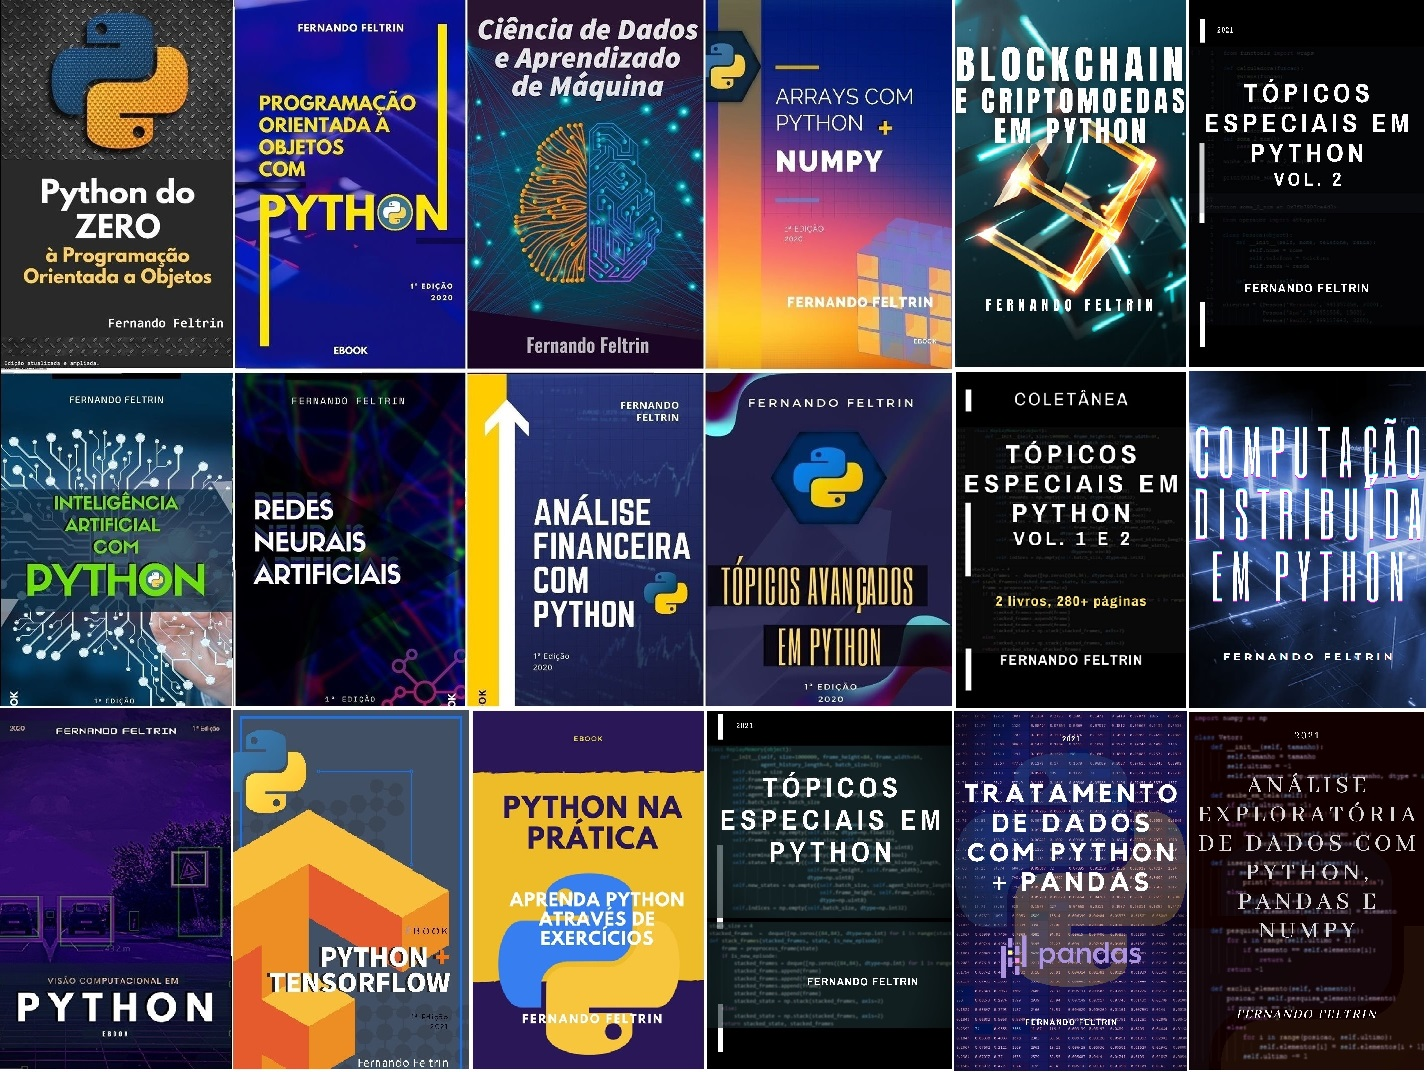

## Disponível em: [Amazon.com.br](https://www.amazon.com.br/s?i=digital-text&rh=p_27%3AFernando+Feltrin&s=relevancerank&text=Fernando+Feltrin&ref=dp_byline_sr_pop_ebooks_1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras import backend as B
from keras.utils.vis_utils import plot_model
from keras_sequential_ascii import keras2ascii
from keras.layers import Conv2D, Conv2DTranspose


In [ ]:
gerador_treino = ImageDataGenerator(rescale = 1.0/255,
                                    rotation_range = 5,
                                    horizontal_flip = True,
                                    shear_range = 0.2,
                                    height_shift_range = 0.07,
                                    zoom_range = 0.2)

gerador_teste = ImageDataGenerator(rescale = 1.0/255)


In [ ]:
base_treino = gerador_treino.flow_from_directory('/CNN_TORAX_12C/dataset/train',
                                                 target_size = (128,128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
base_teste = gerador_teste.flow_from_directory('/CNN_TORAX_12C/dataset/test',
                                               target_size = (128,128),
                                               batch_size = 16,
                                               class_mode = 'categorical')

In [ ]:
classificadorx2 = Sequential()
classificadorx2.add(Conv2D(32,
                         kernel_size = (3,3),
                         padding = 'same',
                         input_shape = (128,128,3),
                         activation = 'relu'))
classificadorx2.add(BatchNormalization())
classificadorx2.add(MaxPooling2D(pool_size = (2,2)))
classificadorx2.add(Conv2D(32,
                         (3,3),
                         activation = 'relu'))
classificadorx2.add(BatchNormalization())
classificadorx2.add(MaxPooling2D(pool_size = (2,2)))
classificadorx2.add(Conv2D(32,
                         (3,3),
                         activation = 'relu'))
classificadorx2.add(Conv2DTranspose(32,
                                   kernel_size = (3,3),
                                   strides = (1, 1),
                                   padding = 'valid',
                                   output_padding = None,
                                   data_format = None,
                                   dilation_rate = (1, 1),
                                   activation = None,
                                   use_bias = True,
                                   kernel_initializer = 'glorot_uniform'))
classificadorx2.add(Flatten())
classificadorx2.add(Dense(units = 128,
                         activation = 'relu',
                         use_bias=True,
                         kernel_initializer='glorot_uniform',
                         bias_initializer='zeros'))
classificadorx2.add(Dropout(0.2))
classificadorx2.add(Dense(units = 128,
                         activation = 'relu',
                         use_bias=True,
                         kernel_initializer='glorot_uniform',
                         bias_initializer='zeros'))
classificadorx2.add(Dropout(0.2))
classificadorx2.add(Dense(units = 128,
                        activation = 'relu'))
classificadorx2.add(Dropout(0.2))
classificadorx2.add(Dense(units = 11,
                        activation = 'sigmoid'))


In [ ]:
classificadorx2.compile(optimizer = 'Adam',
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])


In [ ]:
learning_rate = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [ ]:
h_x2 = classificadorx2.fit(base_treino,
                        steps_per_epoch = 1000,
                        epochs = 1000,
                        validation_data = base_teste,
                        callbacks = [learning_rate],
                        verbose = 1,
                        validation_steps = 100)


In [ ]:
classificadorx2.save_weights('/content/drive/MyDrive/Colab Notebooks/CNN_TORAX.h5')
classificadorx2.save('/content/drive/MyDrive/Colab Notebooks/CNN_TORAX.h5')


In [ ]:
model = Sequential()
model = load_model('/content/drive/MyDrive/Colab Notebooks/CNN_TORAX.h5')

img_teste = load_img('', target_size = (128, 128))

img_plot = PIL.Image.open('')

plt.figure(figsize=(8,8))
plt.imshow(img_plot)
plt.show()

img_teste = image.img_to_array(img_teste)
img_teste /= 255
img_teste = np.expand_dims(img_teste, axis = 0)

resultado_teste = model.predict(img_teste)
resultado_final = resultado_teste
